# Application of BoaG in identifying misassigned taxonomies in the NCBI's NR database

Here we use BoaG infrastructure to quickly get the frequency and proveance of annotations for the entire NR and all the clusters at 95% sequence similarity. Then, we use ETE3 library to generate tree from the BoaG output.




### Boa query to get cluster ID, sequence ID, and tax id

```
s: Sequence = input;
counts: output sum[string][string][string] of int;

foreach(i:int; def(s.cluster[i])){
  if (s.cluster[i].similarity==95){
    foreach(j:int; def(s.annotation[j]))
	  counts [s.cluster[i].cid][s.annotation[j].keyID][s.annotation[j].tax_id] <<1;
  }
}

```



In [1]:
from ete3 import NCBITaxa, Tree, faces, AttrFace, TreeStyle, NodeStyle, TextFace




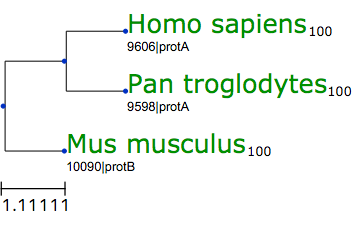

In [4]:
from ete3 import NCBITaxa, PhyloTree, Tree

def layout(node):
    # If node is a leaf, add the nodes name and a its scientific name
    nameFace = faces.AttrFace("sci_name", fsize=20, fgcolor="#009000")

    rank = 100
    if node.is_leaf():
        faces.add_face_to_node(nameFace, node, column=0)
        node.add_face(TextFace(rank), column=2, position = "branch-right")

        
ncbi = NCBITaxa()

setData=set()
listData = list()


# load the whole leaf name as species taxid
tree = PhyloTree('((9606, 9598), 10090);', sp_naming_function=lambda name: name)
tax2names, tax2lineages, tax2rank = tree.annotate_ncbi_taxa()

# split names by '|' and return the first part as the species taxid
tree = PhyloTree('((9606|protA, 9598|protA), 10090|protB);', sp_naming_function=lambda name: name.split('|')[0])
tax2names, tax2lineages, tax2rank = tree.annotate_ncbi_taxa()

# print (tree.get_ascii(attributes=["name", "sci_name", "taxid"]))

ts.layout_fn = layout


tree.render("%%inline", w=100, units="mm", tree_style=ts)
# tree.show(tree_style =ts)


## Annotate tree with sci_name

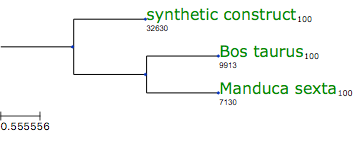

In [15]:
##### 1K9O:32630=3;7130=2;9913=2

from ete3 import NCBITaxa, PhyloTree, Tree, faces, AttrFace, TreeStyle
ncbi = NCBITaxa()

def layout(node):
    # If node is a leaf, add the nodes name and a its scientific name
    nameFace = faces.AttrFace("sci_name", fsize=20, fgcolor="#009000")

    rank = 100
    if node.is_leaf():
        faces.add_face_to_node(nameFace, node, column=0)
        node.add_face(TextFace(rank), column=2, position = "branch-right")



tree = ncbi.get_topology([32630, 7130,9913], intermediate_nodes=False)

ts = TreeStyle()
ts.show_leaf_name = True
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches
ts.layout_fn = layout

tree.render("%%inline", w=100, units="mm", tree_style=ts)


## Example of misannotations
#### Boa output

```
count[NP_001026909][AAH13172][9606] = 1
count[NP_001026909][AEE60937][9606] = 1
count[NP_001026909][AIC53124][32630] = 1
count[NP_001026909][EAW98870][9606] = 1
count[NP_001026909][EAW98876][9606] = 1
count[NP_001026909][NP_001026909][9606] = 1
count[NP_001026909][Q96DX5][9606] = 1
count[NP_001026909][SJX33320][1958742] = 1
count[NP_001026909][XP_005274503][9606] = 1



                                          /-synthetic construct, species, 1
             /artificial sequences, no rank
-root, no rank                            \-Human ORFeome Gateway entry vector, species, 1
            |
             \-Homo sapiens, species, 7
             
             
```

Error in tree ncbi
Error in tree ncbi
Error in tree ncbi


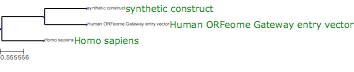

In [7]:
from ete3 import NCBITaxa
ncbi = NCBITaxa()


def layout(node):

    # If node is a leaf, add the nodes name and a its scientific name
    nameFace = faces.AttrFace("name", fsize=20, fgcolor="#009000")

    rank = 100
    if node.is_leaf():
        faces.add_face_to_node(nameFace, node, column=2)
        try:
            txt2name=ncbi.get_taxid_translator([node.name])

            for item in txt2name:
                sci_name =txt2name[item]

            faces.add_face_to_node(TextFace(sci_name, fsize=30), node, column=0)

        except:
            print("Error in tree ncbi")

tax_list = [9606, 32630, 1958742]
# tree = ncbi.get_topology(tax_list, intermediate_nodes=False)
tree= Tree("((synthetic construct:1,Human ORFeome Gateway entry vector:1)1:1,Homo sapiens:1);")

for node in tree:
    node.add_features(count=14) 
    
ts = TreeStyle()
ts.show_leaf_name = True
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches
ts.layout_fn = layout


tree.render("%%inline", w=100, units="mm", tree_style=ts)


In [8]:
print(tree.write())

((synthetic construct:1,Human ORFeome Gateway entry vector:1)1:1,Homo sapiens:1);


In [9]:
print (tree.get_ascii(attributes=["name", "sci_name"]))
#((synthetic construct:1,Human ORFeome Gateway entry vector:1)root:1,Homo sapiens:1);


      /-synthetic construct
   /-|
--|   \-Human ORFeome Gateway entry vector
  |
   \-Homo sapiens


In [10]:
print(Tree("((synthetic construct:1,Human ORFeome Gateway entry vector:1)1:1,Homo sapiens:1);", format=2))


      /-synthetic construct
   /-|
--|   \-Human ORFeome Gateway entry vector
  |
   \-Homo sapiens


In [11]:
# Import Tree instance and faces module
from ete3 import ClusterTree
# Example of a minimalistic numerical matrix. It is encoded as a text
# string for convenience, but it usally be loaded from a text file.

#print(Tree("((synthetic construct:1,Human ORFeome Gateway entry vector:1)1:1,Homo sapiens:1);", format=2))
matrix = """
#Names\tRefSeq\tGenBank\tPDB\tSwissProt\tTrEMBL
Homo sapiens\t1\t5.0\t0\t1\t0  
synthetic construct\t0\t1\t0\t0\t0  
Human ORFeome Gateway entry vector\t1\t0\t0\t0\t0  
"""
print ("Example numerical matrix")
print (matrix)
# We load a tree structure whose leaf nodes correspond to rows in the
# numerical matrix. 

# We use the text_array argument to link the tree
# with numerical matrix.
t = ClusterTree(tree.write(),  text_array=matrix)

Example numerical matrix

#Names	RefSeq	GenBank	PDB	SwissProt	TrEMBL
Homo sapiens	1	5.0	0	1	0  
synthetic construct	0	1	0	0	0  
Human ORFeome Gateway entry vector	1	0	0	0	0  



cluster_bars


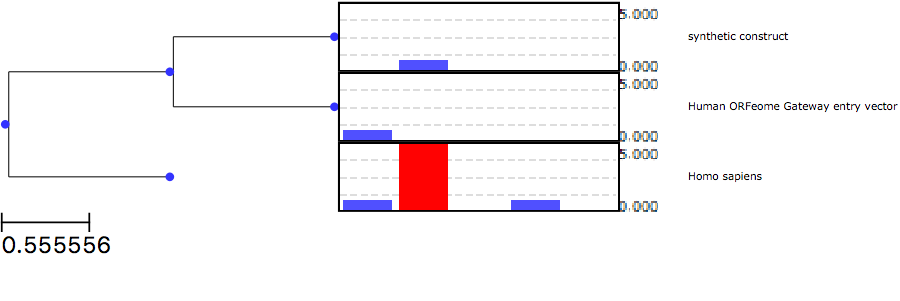

In [12]:
print("cluster_bars")
t.render("%%inline", "cluster_bars", w=900)

In [104]:
from ete3 import Tree
t = Tree("((A, B)Internal_1:0.7, (C, D)Internal_2:0.5)root:1.3;", format=1)
# we add a custom annotation to the node named A
(t & "A").add_features(label="custom Value")
# we add a complex feature to the A node, consisting of a list of lists
(t & "A").add_features(complex=[[0,1], [2,3], [1,11], [1,0]])
print(t.write(format=1))
print (t.get_ascii(attributes=["name", "dist", "label", "complex"]))

((A:1,B:1)Internal_1:0.7,(C:1,D:1)Internal_2:0.5);

                        /-A, 1.0, custom Value, [[0, 1], [2, 3], [1, 11], [1, 0]]
         /Internal_1, 0.7
        |               \-B, 1.0
-root, 1.3
        |               /-C, 1.0
         \Internal_2, 0.5
                        \-D, 1.0


## Cluster misannotations (cid =169919)

### Boa query to get cluster ID, sequence ID, and tax id

```
s: Sequence = input;
counts: output sum[string][string][string] of int;

foreach(i:int; def(s.cluster[i])){
  if (s.cluster[i].similarity==95){
    foreach(j:int; def(s.annotation[j]))
	  counts [s.cluster[i].cid][s.annotation[j].keyID][s.annotation[j].tax_id] <<1;
  }
}

```

#### Outupt:

```
counts[4068274][ABY50073][490503] = 1
counts[4695268][ABY50072][490503] = 1
counts[490503][AAF97425][69577] = 1
counts[490503][AAR86692][328670] = 1
counts[490503][AAS48724][69577] = 1
counts[490503][ABU53625][69577] = 1
counts[490503][ABU53626][69577] = 1
counts[490503][ABU53627][69577] = 1
counts[490503][ABU53628][69577] = 1
counts[490503][ABU53629][69577] = 1
counts[490503][ABU53630][69577] = 1
counts[490503][ABU53631][69577] = 1
counts[490503][ABU53632][69577] = 1
counts[490503][ACL37065][69577] = 1
counts[490503][ACL37066][69577] = 1
counts[490503][ACL37067][69577] = 1
counts[490503][ADB24016][52838] = 1
counts[490503][ADB24017][52838] = 1
counts[490503][ADB24018][52838] = 1
counts[490503][ADB24019][52838] = 1
counts[490503][ADB24020][52838] = 1
counts[490503][ADB24021][52838] = 1
counts[490503][ADB24022][52838] = 1
counts[490503][ADB24023][52838] = 1
counts[490503][ADB24024][52838] = 1
counts[490503][ADB24025][52838] = 1
counts[490503][ADB24026][52838] = 1
counts[490503][ADB24027][52838] = 1
counts[490503][ADB24028][52838] = 1
counts[490503][ADB24029][52838] = 1
counts[490503][ADB24030][52838] = 1
counts[490503][ADB24031][52838] = 1
counts[490503][ADB24032][52838] = 1
counts[490503][ADB24033][52838] = 1
counts[490503][ADB24034][52838] = 1
counts[490503][ADB24035][52838] = 1
counts[490503][AEP82796][328670] = 1
counts[490503][AEP82797][328670] = 1
counts[490503][AEP82798][328670] = 1
counts[490503][AEP82799][328670] = 1
counts[490503][AEP82800][328670] = 1
counts[490503][AEP82801][328670] = 1
counts[490503][AEP82802][328670] = 1
counts[490503][AEP82803][328670] = 1
counts[490503][AEP82804][328670] = 1
counts[490503][AEP82805][328670] = 1
counts[490503][AEP82806][328670] = 1
counts[490503][AEP82807][328670] = 1
counts[490503][AHA62482][328670] = 1
counts[490503][AHM92951][328670] = 1
counts[490503][ANK58362][69577] = 1
counts[490503][APW78128][328670] = 1
counts[490503][APW78129][328670] = 1
counts[490503][APW78131][328670] = 1
counts[490503][AQL57118][328670] = 1
counts[490503][AQL57119][328670] = 1
counts[490503][ASB34187][69577] = 1
counts[490503][ASB34188][69577] = 1
counts[490503][ASB34189][69577] = 1
counts[490503][CAI91424][328670] = 1
counts[490503][CAI91425][328670] = 1
counts[490503][CAI91426][328670] = 1
counts[490503][CAI91427][328670] = 1
counts[490503][CAI91428][328670] = 1
counts[490503][CAI91429][328670] = 1
counts[490503][CAI91430][328670] = 1
counts[490503][CAI91431][328670] = 1
counts[490503][CAI91432][328670] = 1
counts[490503][CAP19917][69577] = 1
counts[490503][YP_233107][328670] = 1

```

##### Tree

```
 
                              /-Banana streak GF virus, species, 30
             /Badnavirus, genus
-root, no rank                \-Banana streak virus, species, 18
            |
             \-Musa balbisiana, species, 20   
             
```    


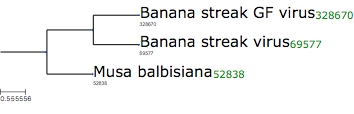

In [8]:
from ete3 import NCBITaxa
ncbi = NCBITaxa()


def layout(node):

    # If node is a leaf, add the nodes name and a its scientific name
    nameFace = faces.AttrFace("name", fsize=20, fgcolor="#009000")

    rank = 100
    if node.is_leaf():
        faces.add_face_to_node(nameFace, node, column=2)
        try:
            txt2name=ncbi.get_taxid_translator([node.name])

            for item in txt2name:
                sci_name =txt2name[item]

            faces.add_face_to_node(TextFace(sci_name, fsize=30), node, column=0)

        except:
            print("Error in tree ncbi")

tax_list = [69577,328670, 52838, 328670 ]
tree = ncbi.get_topology(tax_list, intermediate_nodes=False)
# tree= Tree("((synthetic construct:1,Human ORFeome Gateway entry vector:1)1:1,Homo sapiens:1);")

for node in tree:
    node.add_features(count=14) 
    
ts = TreeStyle()
ts.show_leaf_name = True
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches
ts.layout_fn = layout


tree.render("%%inline", w=100, units="mm", tree_style=ts)


In [9]:
print(tree.write())

((328670:1,69577:1)1:1,52838:1);


In [10]:
print (tree.get_ascii(attributes=["name", "sci_name"]))



                        /-328670, Banana streak GF virus
       /10652, Badnavirus
-1, root                \-69577, Banana streak virus
      |
       \-52838, Musa balbisiana


In [12]:
tree= Tree("((Banana streak GF virus:1,Banana streak virus:1)1:1,Musa balbisiana:1);")


In [23]:
# Import Tree instance and faces module
from ete3 import ClusterTree
# Example of a minimalistic numerical matrix. It is encoded as a text
# string for convenience, but it usally be loaded from a text file.

#print(Tree("((synthetic construct:1,Human ORFeome Gateway entry vector:1)1:1,Homo sapiens:1);", format=2))
matrix = """
#Names\tRefSeq\tGenBank\tPDB\tSwissProt\tTrEMBL
Banana streak GF virus\t2\t28\t0\t0\t0  
Banana streak virus\t2\t16\t0\t0\t0  
Musa balbisiana\t0\t20\t0\t0\t0  
"""
print ("Example numerical matrix")
print (matrix)
# We load a tree structure whose leaf nodes correspond to rows in the
# numerical matrix. 

# We use the text_array argument to link the tree
# with numerical matrix.
t = ClusterTree(tree.write(),  text_array=matrix)

Example numerical matrix

#Names	RefSeq	GenBank	PDB	SwissProt	TrEMBL
Banana streak GF virus	2	28	0	0	0  
Banana streak virus	2	16	0	0	0  
Musa balbisiana	0	20	0	0	0  



cluster_bars


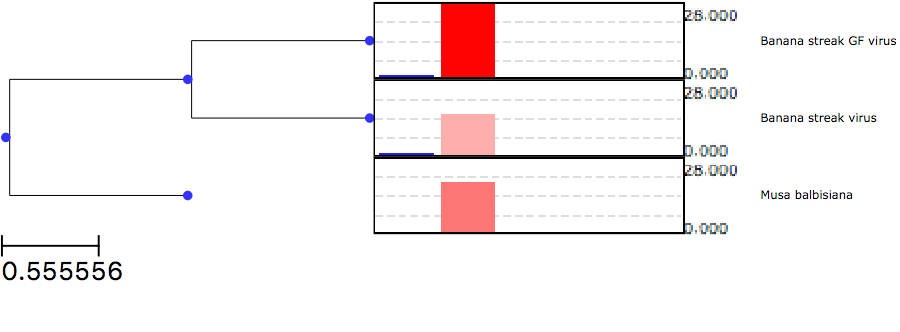

In [24]:
print("cluster_bars")
t.render("%%inline", "cluster_bars", w=900)

In [26]:
str =  "count[12E8][3JAB][9913] = 4"
words = str.split("[")
words


['count', '12E8]', '3JAB]', '9913] = 4']